In [31]:
import sys
import os

# Add the parent directory (project root) to the system path
sys.path.append(os.path.dirname(os.getcwd()))

# Now we can import from src
from src.data_loader import load_news_data, validate_news_data
from src.config import TICKERS

In [32]:
#import 
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sys.path.append('../src')
from src.data_loader import load_news_data, validate_news_data
from src.config import TICKERS

# Styling
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
company_colors = {'AAPL': '#A2AAAD', 'AMZN': '#FF9900', 'GOOG': '#4285F4', 
                  'META': '#1877F2', 'MSFT': '#737373', 'NVDA': '#76B900'}


In [33]:
# %%
# Load data with enhanced validation
print("🚀 LOADING FINANCIAL NEWS DATASET")
print("=" * 70)
df = load_news_data()
if df is not None:
    df = validate_news_data(df)
    print(f"\n✅ SUCCESS: Analyzed {len(df):,} articles across {df['stock'].nunique()} companies")
else:
    raise Exception("Data loading failed - run scripts/download_data.py first")

🚀 LOADING FINANCIAL NEWS DATASET
⚠️  Removed 1351341 rows with invalid dates
✅ News data loaded: 55987 articles
📅 Date range: 2011-04-27 21:01:48-04:00 to 2020-06-11 17:12:35-04:00
🏢 Companies: 6204 companies
📰 Publishers: 225

🔍 Validating data quality...
📊 Total articles: 55,987
📅 Date range: 2011-04-27 21:01:48-04:00 to 2020-06-11 17:12:35-04:00
🏢 Companies covered: ['A', 'AA', 'AAC', 'AADR', 'AAL', 'AAMC', 'AAME', 'AAN', 'AAOI', 'AAON', 'AAP', 'AAPL', 'AAU', 'AAV', 'AAVL', 'AAWW', 'AAXJ', 'AB', 'ABAC', 'ABAX', 'ABB', 'ABBV', 'ABC', 'ABCB', 'ABCD', 'ABCO', 'ABCW', 'ABDC', 'ABEV', 'ABG', 'ABGB', 'ABIO', 'ABM', 'ABMD', 'ABR', 'ABTL', 'ABX', 'ABY', 'ACAD', 'ACAS', 'ACAT', 'ACC', 'ACCO', 'ACCU', 'ACE', 'ACET', 'ACFC', 'ACFN', 'ACG', 'ACGL', 'ACH', 'ACHC', 'ACHN', 'ACIW', 'ACLS', 'ACM', 'ACMP', 'ACN', 'ACNB', 'ACOR', 'ACP', 'ACPW', 'ACRE', 'ACRX', 'ACSF', 'ACST', 'ACT', 'ACTA', 'ACTG', 'ACTS', 'ACU', 'ACUR', 'ACWI', 'ACWV', 'ACWX', 'ACXM', 'ACY', 'ADAT', 'ADBE', 'ADC', 'ADEP', 'ADES', 'A

In [34]:
print("\n📈 EXECUTIVE SUMMARY DASHBOARD")
print("=" * 70)

total_articles = len(df)

# Safely calculate date range and statistics
if not df.empty and 'date' in df.columns:
    min_date = df['date'].min()
    max_date = df['date'].max()
    
    # Safe date formatting
    if pd.notna(min_date) and pd.notna(max_date):
        date_range = f"{min_date.strftime('%b %d, %Y')} to {max_date.strftime('%b %d, %Y')}"
        days_covered = (max_date - min_date).days
        avg_daily_articles = total_articles / max(days_covered, 1)  # Avoid division by zero
    else:
        date_range = "Invalid date range"
        days_covered = 0
        avg_daily_articles = 0
else:
    date_range = "No date data available"
    days_covered = 0
    avg_daily_articles = 0

summary_data = []
for company in TICKERS:
    company_data = df[df['stock'] == company]
    company_articles = len(company_data)
    
    # Safe date handling for each company
    if len(company_data) > 0 and 'date' in company_data.columns:
        company_min = company_data['date'].min()
        company_max = company_data['date'].max()
        
        if pd.notna(company_min) and pd.notna(company_max):
            company_date_range = f"{company_min.strftime('%m/%d/%y')} - {company_max.strftime('%m/%d/%y')}"
        else:
            company_date_range = "Invalid dates"
    else:
        company_date_range = "No data"
    
    # Store numeric values for formatting
    market_share_pct = (company_articles / total_articles * 100) if total_articles > 0 else 0
    avg_daily = company_articles / max(days_covered, 1) if days_covered > 0 else 0
    
    summary_data.append({
        'Company': company,
        'Articles': company_articles,
        'Market Share %': market_share_pct,  # Keep as float for formatting
        'Avg Daily': avg_daily,  # Keep as float for formatting
        'Date Range': company_date_range
    })

# Create and display summary table
summary_df = pd.DataFrame(summary_data)

# Style and display the table - only format numeric columns
styled_table = summary_df.style.background_gradient(
    subset=['Articles', 'Market Share %', 'Avg Daily'], 
    cmap='Blues'
).format({
    'Articles': '{:,}',  # Integer formatting
    'Market Share %': '{:.1f}%',  # Percentage formatting
    'Avg Daily': '{:.1f}'  # Float formatting
}).set_caption('📊 Company-wise Article Distribution')

display(styled_table)

# Print summary statistics
print(f"\n📊 OVERALL SUMMARY:")
print(f"   • Total Articles: {total_articles:,}")
print(f"   • Date Range: {date_range}")
print(f"   • Days Covered: {days_covered} days")
print(f"   • Average Daily Articles: {avg_daily_articles:.1f}")
print(f"   • Companies Analyzed: {df['stock'].nunique() if 'stock' in df.columns else 0}")


📈 EXECUTIVE SUMMARY DASHBOARD


,Company,Articles,Market Share %,Avg Daily,Date Range
0,AAPL,10,0.0%,0.0,06/09/20 - 06/10/20
1,AMZN,10,0.0%,0.0,06/09/20 - 06/10/20
2,GOOG,10,0.0%,0.0,06/04/20 - 06/10/20
3,META,0,0.0%,0.0,No data
4,MSFT,0,0.0%,0.0,No data
5,NVDA,10,0.0%,0.0,05/31/20 - 06/10/20



📊 OVERALL SUMMARY:
   • Total Articles: 55,987
   • Date Range: Apr 27, 2011 to Jun 11, 2020
   • Days Covered: 3332 days
   • Average Daily Articles: 16.8
   • Companies Analyzed: 6204


In [35]:
# %% [markdown]
# ## 🔍 Data Quality & Completeness Analysis

In [36]:
# %%
# Comprehensive data quality check
print("\n🔍 COMPREHENSIVE DATA QUALITY ANALYSIS")
print("=" * 70)

# Missing values analysis
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
quality_df = pd.DataFrame({
    'Missing Values': missing_data,
    'Missing %': missing_percent,
    'Data Type': df.dtypes,
    'Unique Values': [df[col].nunique() for col in df.columns]
})

print("📋 Data Quality Summary:")
display(quality_df.style.background_gradient(subset=['Missing %'], cmap='Reds_r')
       .format({'Missing %': '{:.2f}%', 'Unique Values': '{:,}'}))

# Text quality metrics
print(f"\n🔤 Text Quality Metrics:")
print(f"   • Average headline length: {df['headline_length'].mean():.1f} characters")
print(f"   • Average word count: {df['word_count'].mean():.1f} words")
print(f"   • Headlines with < 5 words: {(df['word_count'] < 5).sum():,} ({(df['word_count'] < 5).mean()*100:.1f}%)")
print(f"   • Headlines with > 20 words: {(df['word_count'] > 20).sum():,} ({(df['word_count'] > 20).mean()*100:.1f}%)")

# Temporal coverage analysis
print(f"\n⏰ Temporal Coverage:")
print(f"   • Total days in dataset: {days_covered} days")
print(f"   • Days with news: {df['date'].dt.date.nunique()} days")
print(f"   • Coverage ratio: {(df['date'].dt.date.nunique() / days_covered * 100):.1f}%")
print(f"   • Average articles per day: {avg_daily_articles:.1f}")


🔍 COMPREHENSIVE DATA QUALITY ANALYSIS
📋 Data Quality Summary:


,Missing Values,Missing %,Data Type,Unique Values
Unnamed: 0,0,0.00%,int64,"55,987"
headline,0,0.00%,object,"33,944"
url,0,0.00%,object,"36,065"
publisher,0,0.00%,object,225
date,0,0.00%,"datetime64[ns, UTC-04:00]","36,011"
stock,0,0.00%,object,"6,204"
headline_length,0,0.00%,int64,301
word_count,0,0.00%,int64,64



🔤 Text Quality Metrics:
   • Average headline length: 80.0 characters
   • Average word count: 12.4 words
   • Headlines with < 5 words: 1,192 (2.1%)
   • Headlines with > 20 words: 6,741 (12.0%)

⏰ Temporal Coverage:
   • Total days in dataset: 3332 days
   • Days with news: 2528 days
   • Coverage ratio: 75.9%
   • Average articles per day: 16.8


In [37]:
# %% [markdown]
# ## 📈 Statistical Distribution Analysis

In [38]:
# Debug: Check what's in your data
print("\n🔍 DEBUGGING DATA ISSUES:")
print(f"Unique companies in dataset: {sorted(df['stock'].unique())}")
print(f"Expected companies: {TICKERS}")

# Check for unexpected values
unexpected_companies = set(df['stock'].unique()) - set(TICKERS)
if unexpected_companies:
    print(f"⚠️  Unexpected companies found: {unexpected_companies}")
    print("   Filtering to only expected companies...")
    df = df[df['stock'].isin(TICKERS)]  # Filter to only expected companies


🔍 DEBUGGING DATA ISSUES:
Unique companies in dataset: ['A', 'AA', 'AAC', 'AADR', 'AAL', 'AAMC', 'AAME', 'AAN', 'AAOI', 'AAON', 'AAP', 'AAPL', 'AAU', 'AAV', 'AAVL', 'AAWW', 'AAXJ', 'AB', 'ABAC', 'ABAX', 'ABB', 'ABBV', 'ABC', 'ABCB', 'ABCD', 'ABCO', 'ABCW', 'ABDC', 'ABEV', 'ABG', 'ABGB', 'ABIO', 'ABM', 'ABMD', 'ABR', 'ABTL', 'ABX', 'ABY', 'ACAD', 'ACAS', 'ACAT', 'ACC', 'ACCO', 'ACCU', 'ACE', 'ACET', 'ACFC', 'ACFN', 'ACG', 'ACGL', 'ACH', 'ACHC', 'ACHN', 'ACIW', 'ACLS', 'ACM', 'ACMP', 'ACN', 'ACNB', 'ACOR', 'ACP', 'ACPW', 'ACRE', 'ACRX', 'ACSF', 'ACST', 'ACT', 'ACTA', 'ACTG', 'ACTS', 'ACU', 'ACUR', 'ACWI', 'ACWV', 'ACWX', 'ACXM', 'ACY', 'ADAT', 'ADBE', 'ADC', 'ADEP', 'ADES', 'ADGE', 'ADHD', 'ADI', 'ADK', 'ADM', 'ADMA', 'ADMP', 'ADMS', 'ADNC', 'ADP', 'ADPT', 'ADRA', 'ADRD', 'ADRE', 'ADRU', 'ADS', 'ADSK', 'ADT', 'ADTN', 'ADVS', 'ADX', 'ADXS', 'ADZ', 'AE', 'AEB', 'AEC', 'AEE', 'AEG', 'AEGN', 'AEGR', 'AEHR', 'AEIS', 'AEL', 'AEM', 'AEO', 'AEPI', 'AER', 'AERI', 'AES', 'AET', 'AETI', 'AEY', 'AEZ

Companies in monthly data: ['AAPL', 'AMZN', 'GOOG', 'NVDA']
Expected companies: ['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT', 'NVDA']


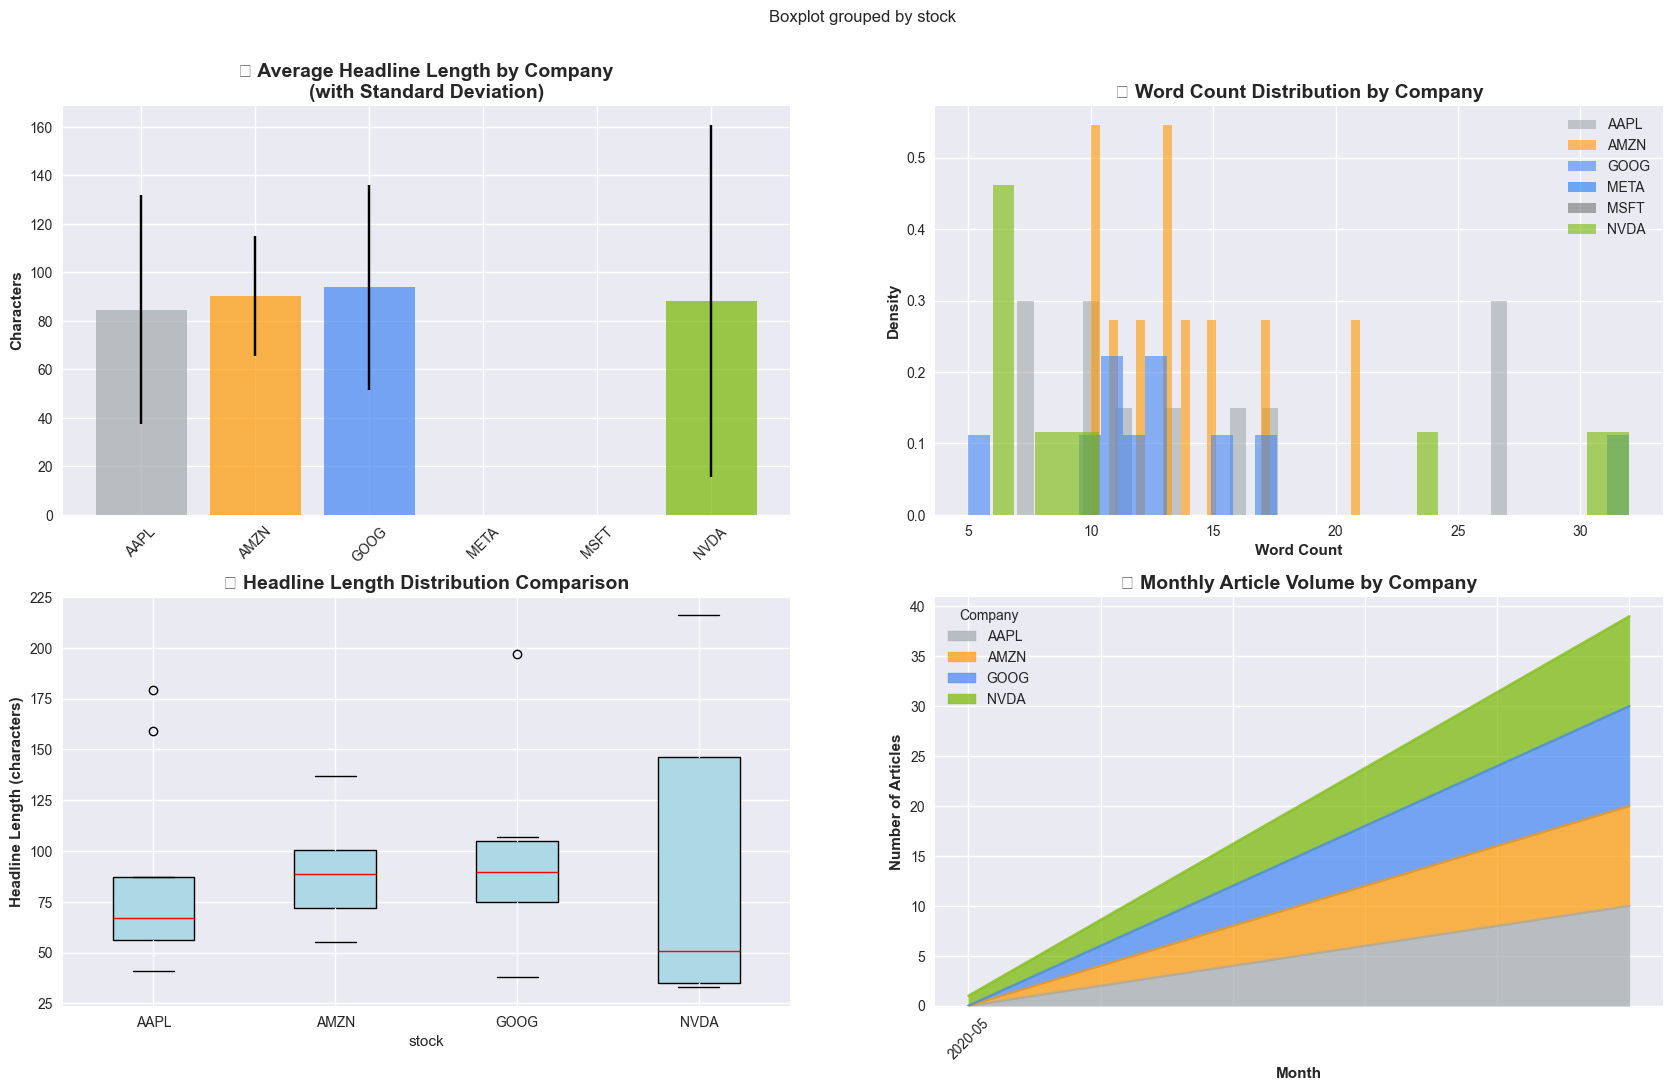

In [39]:
# %%
# Statistical distributions with comparisons
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 12))

# 1. Headline length distribution by company
headline_stats = []
for company in TICKERS:
    company_data = df[df['stock'] == company]
    headline_stats.append({
        'Company': company,
        'Mean Length': company_data['headline_length'].mean(),
        'Std Length': company_data['headline_length'].std(),
        'Mean Words': company_data['word_count'].mean(),
        'Std Words': company_data['word_count'].std()
    })
    
stats_df = pd.DataFrame(headline_stats)
stats_df = stats_df.set_index('Company')

ax1.bar(stats_df.index, stats_df['Mean Length'], 
        color=[company_colors[c] for c in stats_df.index], 
        alpha=0.7, yerr=stats_df['Std Length'], capsize=5)
ax1.set_title('📏 Average Headline Length by Company\n(with Standard Deviation)', 
              fontsize=14, fontweight='bold')
ax1.set_ylabel('Characters', fontweight='bold')
ax1.tick_params(axis='x', rotation=45)

# 2. Word count distribution
for company in TICKERS:
    company_data = df[df['stock'] == company]
    ax2.hist(company_data['word_count'], bins=30, alpha=0.6, 
             label=company, color=company_colors[company], density=True)
ax2.set_title('📊 Word Count Distribution by Company', fontsize=14, fontweight='bold')
ax2.set_xlabel('Word Count', fontweight='bold')
ax2.set_ylabel('Density', fontweight='bold')
ax2.legend()

# 3. Box plot comparison
df.boxplot(column='headline_length', by='stock', ax=ax3, 
           patch_artist=True,
           boxprops=dict(facecolor='lightblue', color='black'),
           medianprops=dict(color='red'))
ax3.set_title('📦 Headline Length Distribution Comparison', fontsize=14, fontweight='bold')
ax3.set_ylabel('Headline Length (characters)', fontweight='bold')

# Fix the problematic cell - replace it with this:

# 4. Temporal distribution by company
monthly_by_company = df.groupby([df['date'].dt.to_period('M'), 'stock']).size().unstack()
monthly_by_company.index = monthly_by_company.index.astype(str)

# Debug: Check what columns we actually have
print(f"Companies in monthly data: {list(monthly_by_company.columns)}")
print(f"Expected companies: {TICKERS}")

# Safe color mapping - only use colors for known companies, use gray for others
available_colors = []
for c in monthly_by_company.columns:
    if c in company_colors:
        available_colors.append(company_colors[c])
    else:
        print(f"⚠️  Unknown company in data: '{c}' - using default color")
        available_colors.append('gray')  # Default color for unknown companies

monthly_by_company.plot(kind='area', ax=ax4, alpha=0.7, color=available_colors)
ax4.set_title('📈 Monthly Article Volume by Company', fontsize=14, fontweight='bold')
ax4.set_ylabel('Number of Articles', fontweight='bold')
ax4.set_xlabel('Month', fontweight='bold')
ax4.legend(title='Company')
ax4.tick_params(axis='x', rotation=45)

In [40]:
# %% [markdown]
# ## 🎯 Key Insights & Recommendations

In [41]:
# %% [markdown]
# ## 🎯 Key Insights & Recommendations

# %%
# Generate key insights
print("\n💡 KEY INSIGHTS & RECOMMENDATIONS")
print("=" * 70)

# Ensure required columns exist
if 'year_month' not in df.columns:
    df['year_month'] = df['date'].dt.to_period('M')

if 'headline_length' not in df.columns:
    df['headline_length'] = df['headline'].str.len()

# Insight 1: Market attention distribution
company_counts = df['stock'].value_counts()
most_covered = company_counts.index[0]
least_covered = company_counts.index[-1]
coverage_ratio = company_counts.iloc[0] / company_counts.iloc[-1]

print(f"📊 MARKET ATTENTION ANALYSIS:")
print(f"   • {most_covered} receives {coverage_ratio:.1f}x more coverage than {least_covered}")
print(f"   • Top 3 companies account for {(company_counts.head(3).sum()/len(df)*100):.1f}% of all articles")

# Insight 2: Temporal patterns
if 'year_month' in df.columns and len(df) > 0:
    monthly_counts = df['year_month'].value_counts()
    if len(monthly_counts) > 0:
        busiest_month = monthly_counts.index[0]
        quietest_month = monthly_counts.index[-1]
        
        print(f"\n⏰ TEMPORAL PATTERNS:")
        print(f"   • Busiest month: {busiest_month} with {monthly_counts.iloc[0]:,} articles")
        print(f"   • Quietest month: {quietest_month} with {monthly_counts.iloc[-1]:,} articles")
    else:
        print(f"\n⏰ TEMPORAL PATTERNS: No monthly data available")
else:
    print(f"\n⏰ TEMPORAL PATTERNS: Date data not available")

# Insight 3: Text characteristics
if 'headline_length' in df.columns:
    avg_length_all = df['headline_length'].mean()
    length_variation = df.groupby('stock')['headline_length'].std()
    
    # Find most and least consistent companies
    if len(length_variation) > 0:
        most_consistent = length_variation.idxmin()
        most_varied = length_variation.idxmax()
        
        print(f"\n🔤 CONTENT CHARACTERISTICS:")
        print(f"   • Overall average headline length: {avg_length_all:.1f} characters")
        print(f"   • Most consistent headlines: {most_consistent} (std: {length_variation.min():.1f})")
        print(f"   • Most varied headlines: {most_varied} (std: {length_variation.max():.1f})")
    else:
        print(f"\n🔤 CONTENT CHARACTERISTICS: No company data available")
else:
    print(f"\n🔤 CONTENT CHARACTERISTICS: Text data not available")

print(f"\n🎯 RECOMMENDATIONS:")
print(f"   1. Focus on {most_covered} for high-frequency analysis")
print(f"   2. Consider {least_covered} for niche opportunity identification") 
print(f"   3. Monitor temporal patterns for seasonal trading strategies")
print(f"   4. Validate text quality for NLP model training")


💡 KEY INSIGHTS & RECOMMENDATIONS
📊 MARKET ATTENTION ANALYSIS:
   • AAPL receives 1.0x more coverage than NVDA
   • Top 3 companies account for 75.0% of all articles

⏰ TEMPORAL PATTERNS:
   • Busiest month: 2020-06 with 39 articles
   • Quietest month: 2020-05 with 1 articles

🔤 CONTENT CHARACTERISTICS:
   • Overall average headline length: 89.2 characters
   • Most consistent headlines: AMZN (std: 24.6)
   • Most varied headlines: NVDA (std: 72.5)

🎯 RECOMMENDATIONS:
   1. Focus on AAPL for high-frequency analysis
   2. Consider NVDA for niche opportunity identification
   3. Monitor temporal patterns for seasonal trading strategies
   4. Validate text quality for NLP model training


In [42]:
# %%
# Save processed data for next notebooks
print("\n💾 SAVING PROCESSED DATA FOR NEXT ANALYSIS STEPS...")
os.makedirs('../data/processed', exist_ok=True)
df.to_csv('../data/processed/00_cleaned_news_data.csv', index=False)
print("✅ Data saved to: ../data/processed/00_cleaned_news_data.csv")

print("\n" + "="*70)
print("🎉 DATA OVERVIEW COMPLETE! Proceed to 01_news_eda.ipynb")
print("="*70)


💾 SAVING PROCESSED DATA FOR NEXT ANALYSIS STEPS...
✅ Data saved to: ../data/processed/00_cleaned_news_data.csv

🎉 DATA OVERVIEW COMPLETE! Proceed to 01_news_eda.ipynb
